In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from  sklearn.preprocessing import PolynomialFeatures

In [2]:
data=pd.read_excel('E:/R/Data Sets/DatasetsPUNE/100mrun.xlsx')
# data.corr()
# data=pd.DataFrame(data,columns=['Year','Time'])
#data=data.drop(0)
# data.columns(['Year','time'])
#data=data.rename(columns={'100 m running':'Year','Unnamed: 1':'time'})
data


,Year,Time(sec)
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1908,10.80
4,1912,10.80
5,1920,10.80
6,1924,10.60
7,1928,10.80
8,1932,10.30
9,1936,10.30


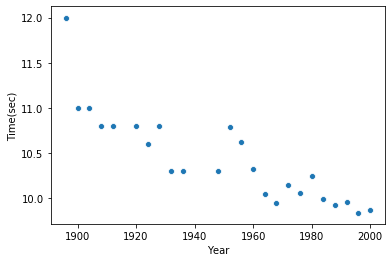

In [3]:
sns.scatterplot(data=data,x='Year',y='Time(sec)')

In [4]:
data.corr(method='pearson')

,Year,Time(sec)
Year,1.000000,-0.865627
Time(sec),-0.865627,1.000000


In [11]:
x=data[['Year']]
y=data['Time(sec)']
# sns.heatmap(data=data)
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
lr=LinearRegression()
lr.fit(x,y)
print('intercept=',lr.intercept_)
print('slope=',lr.coef_)

y_pred=lr.predict(x)
print('mse',mean_squared_error(y,y_pred))
print('r2',r2_score(y,y_pred))

intercept= 36.316124150792604
slope= [-0.01327308]
mse 0.061454470716220184
r2 0.7493096720669312


In [12]:
n=lr.intercept_+lr.coef_*2004
n
# this is prediction of olmpyic 100 meter running time is 9.71687492

array([9.71687492])

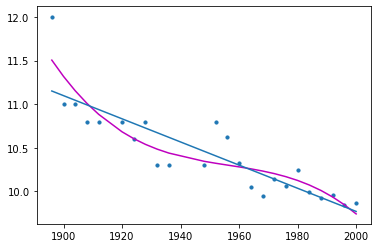

In [23]:
# if you need to check polynomial by degree 3 u can also use degree more
polynomial_features=PolynomialFeatures(degree=3)
x_poly=polynomial_features.fit_transform(x)

model= LinearRegression()
model.fit(x_poly,y)
y_poly3_pred=model.predict(x_poly)

plt.scatter(x,y,s=10)
plt.plot(x,y_poly3_pred,color='m')
plt.plot(x,y_pred)
plt.show()

In [21]:
#print(model.intercept_)
print("MSE:",mean_squared_error(y,y_poly3_pred))
print("R^2: " ,r2_score(y,y_poly3_pred))

30302.816274303383
MSE: 0.0444632895774727
R^2:  0.8186215499824061
